Використано бібліотеки TensorFlow, Keras для побудови та тренування моделі, а також ImageDataGenerator для підготовки та обробки даних. Для візуалізації результатів використано Matplotlib.

Встановлено шляхи до даних для тренувальної та тестової вибірки, що знаходяться в директоріях train та test відповідно.

За допомогою індексів класів [10, 40, 70] вибрано три категорії продуктів для класифікації.

Використано ImageDataGenerator для нормалізації зображень (масштабування пікселів від 0 до 1). Генератори даних створено для тренувальної та тестової вибірки з відповідними параметрами.

Використано базову модель EfficientNetB0, яка заморожена (не тренується), і додано власні шари: GlobalAveragePooling2D та Dense з кількістю класів. Модель компілюється з оптимізатором Adam і функцією втрат categorical_crossentropy.

Модель була натренована на вибраних даних протягом 10 епох.

Оцінено точність та втрати моделі на тестовому наборі даних.

Побудовано графіки точності та втрат на тренувальних та тестових даних для всіх епох.

Selected classes: beet_salad, escargots, mussels
Found 225 files belonging to 3 classes.
Found 750 files belonging to 3 classes.
Epoch 1/10


c:\work prog\3 курс 1 семестр\Аналіз данних\data-science\.venv\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 772ms/step - accuracy: 0.3629 - loss: 2.0096 - val_accuracy: 0.3333 - val_loss: 1.1032
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 684ms/step - accuracy: 0.2944 - loss: 1.1085 - val_accuracy: 0.3333 - val_loss: 1.1027
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 679ms/step - accuracy: 0.3657 - loss: 1.0848 - val_accuracy: 0.3333 - val_loss: 1.7722
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 709ms/step - accuracy: 0.4036 - loss: 1.2716 - val_accuracy: 0.3280 - val_loss: 1.1012
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 726ms/step - accuracy: 0.4070 - loss: 1.0703 - val_accuracy: 0.3160 - val_loss: 1.0957
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 711ms/step - accuracy: 0.4813 - loss: 1.0672 - val_accuracy: 0.3507 - val_loss: 1.0779
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 708ms/step - accuracy: 0.5993 - loss: 1.0384 - val_accuracy: 0.4933 - val_loss: 1.0751
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 707ms/step - accuracy: 0.5146 - loss: 0.9839 - val_accuracy: 0.4160 - val_loss: 1.0644
Epo

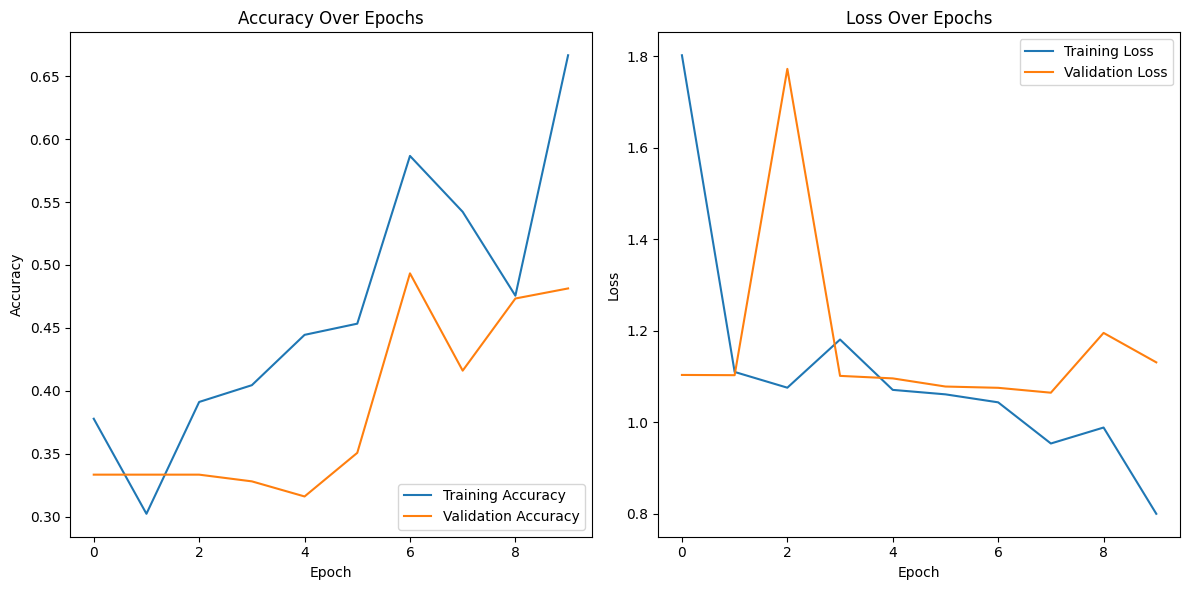

In [48]:
import os
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt
import numpy as np

# Шляхи до директорій з даними
train_dir = "C:/Users/Andrew/Downloads/101_food_classes_10_percent/train"
test_dir = "C:/Users/Andrew/Downloads/101_food_classes_10_percent/test"

# 2. Визначення індексів класів для класифікації
n = 6  # Базовий індекс
i1 = n - 1
i2 = n + 29
i3 = n + 59

# Перевірка наявності класів у тренувальній директорії
class_names = sorted(os.listdir(train_dir))
print(f"Selected classes: {class_names[i1]}, {class_names[i2]}, {class_names[i3]}")

# 3. Завантаження даних для вибраних класів
selected_classes = [class_names[i1], class_names[i2], class_names[i3]]

# Завантаження тренувальних та тестових даних
train_dataset = image_dataset_from_directory(
    directory=train_dir,
    label_mode='int',
    class_names=selected_classes,
    image_size=(180, 180),
    batch_size=32
)

test_dataset = image_dataset_from_directory(
    directory=test_dir,
    label_mode='int',
    class_names=selected_classes,
    image_size=(180, 180),
    batch_size=32
)

# 4. Створення моделі
model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(180, 180, 3)),  # Масштабування пікселів
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(3, activation='softmax')  # Для 3 класів
])

# 5. Компіляція моделі
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# 6. Тренування моделі
history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=test_dataset
)

# 7. Оцінка моделі
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f'Test accuracy: {test_accuracy*100:.2f}%')

# 8. Виведення графіків точності та втрат
plt.figure(figsize=(12, 6))

# Графік точності
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Графік втрат
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


In [49]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(3, activation='softmax')  # 3 класи
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

c:\work prog\3 курс 1 семестр\Аналіз данних\data-science\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,035,203 (72.61 MB)

 Trainable params: 19,035,203 (72.61 MB)

 Non-trainable params: 0 (0.00 B)